## Course Title: Data Science
## Course Code: IOT- 4313

# <p style="text-align:center; color:blue;"><u> Assignment-02</p></u>

## Name: Nishat Tasnim Shishir
## ID: 1901030

# PART (A)
## K-means Clustering

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

C:\Users\Gazi Computer\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\Gazi Computer\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [3]:
d = pd.read_csv("I:\\Downloads\\Mall_Customers.csv")
d

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
# Extracting relevant features for clustering (Annual Income and Spending Score)
a = d.iloc[:, [3, 4]].values


###  K-Means is a distance-based algorithm. For this we need to standardize data.

In [9]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(a)

# statistics of scaled data
pd.DataFrame(data_scaled).describe()

,0,1
count,2.000000e+02,2.000000e+02
mean,7.105427e-17,7.549517e-17
std,1.002509e+00,1.002509e+00
min,-1.738999e+00,-1.910021e+00
25%,-7.275093e-01,-5.997931e-01
50%,3.587926e-02,-7.764312e-03
75%,6.656748e-01,8.851316e-01
max,2.917671e+00,1.894492e+00


In [10]:
# Initialize variables to store SSE values
sse = []

In [11]:
pip install --upgrade scikit-learn threadpoolctl

Note: you may need to restart the kernel to use updated packages.


In [14]:
# Performing K-means clustering for K values from 1 to 15
for k in range(1, 16):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)

C:\Users\Gazi Computer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Gazi Computer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Gazi Computer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Gazi Computer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known

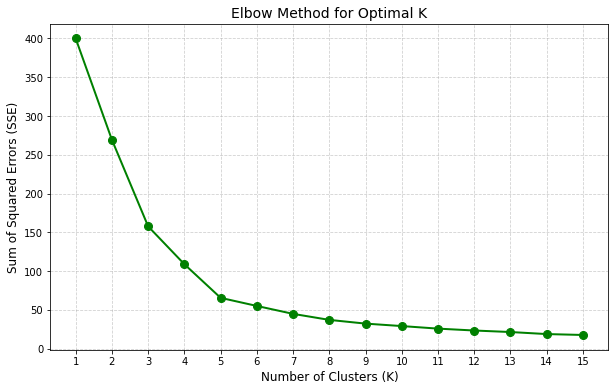

In [27]:
# Plot SSE values for different K values 
plt.figure(figsize=(10, 6))
plt.plot(range(1, 16), sse, marker='o', linestyle='-', color='green', linewidth=2, markersize=8)


plt.title('Elbow Method for Optimal K', fontsize=14)
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('Sum of Squared Errors (SSE)', fontsize=12)

plt.xticks(range(1, 16), fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

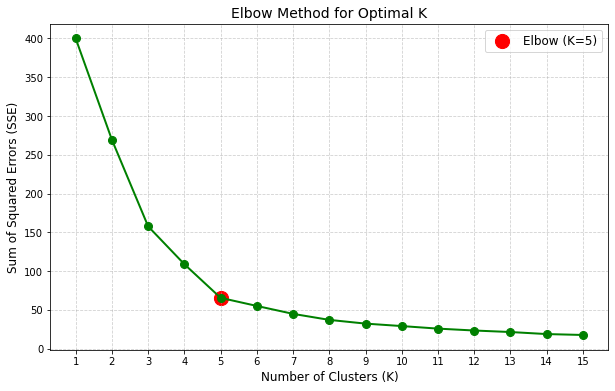

In [71]:

plt.figure(figsize=(10, 6))
plt.plot(range(1, 16), sse, marker='o', linestyle='-', color='green', linewidth=2, markersize=8)


plt.title('Elbow Method for Optimal K', fontsize=14)
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('Sum of Squared Errors (SSE)', fontsize=12)


plt.grid(True, linestyle='--', alpha=0.6)


plt.xticks(range(1, 16), fontsize=10)
plt.yticks(fontsize=10)


# Highlight the "elbow" point with a red dot
elbow_k = 5 
elbow_sse = sse[elbow_k - 1]
plt.scatter(elbow_k, elbow_sse, c='red', s=200, label=f'Elbow (K={elbow_k})')

plt.legend(loc='best', fontsize=12)

plt.show()

# PART (B)
## Hierarchical Clustering

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import normalize

In [50]:
d = pd.read_csv("I:\\Downloads\\Mall_Customers.csv")
d

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [51]:
a= d.iloc[:, [3, 4]].values

###  Before applying Hierarchical Clustering, we have to standerdize the data so that the scale of each variable is the same for avoiding biasing.

In [52]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(a)
data_scaled

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

In [54]:
linked = linkage(data_scaled, method='ward', metric='euclidean')

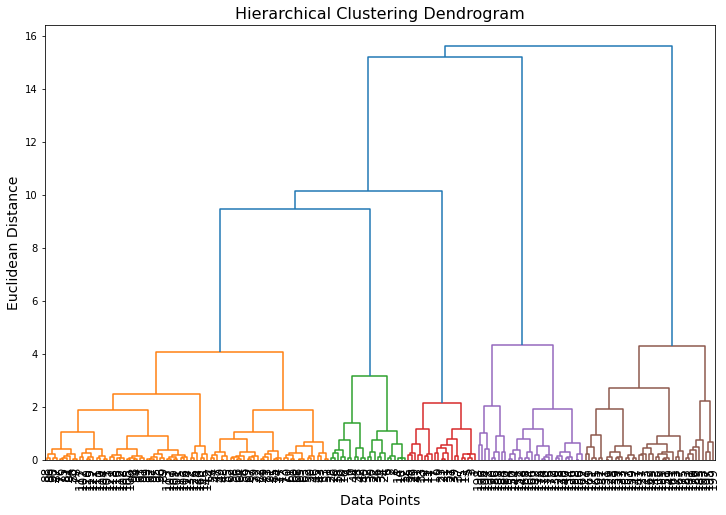

In [70]:

plt.figure(figsize=(12, 8))  


dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True,
           leaf_font_size=12, leaf_rotation=90, color_threshold=5) 

plt.title('Hierarchical Clustering Dendrogram', fontsize=16)
plt.xlabel('Data Points', fontsize=14)
plt.ylabel('Euclidean Distance', fontsize=14)

plt.show()

# PART (C)
## Density-based Clustering

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

In [65]:
d = pd.read_csv("I:\\Downloads\\Mall_Customers.csv")
d

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [66]:
a= d.iloc[:, [3, 4]].values

In [67]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(a)

In [69]:
# Creating a DBSCAN clustering model
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan.fit(data_scaled)

# Get the labels assigned to each data point
labels = dbscan.labels_

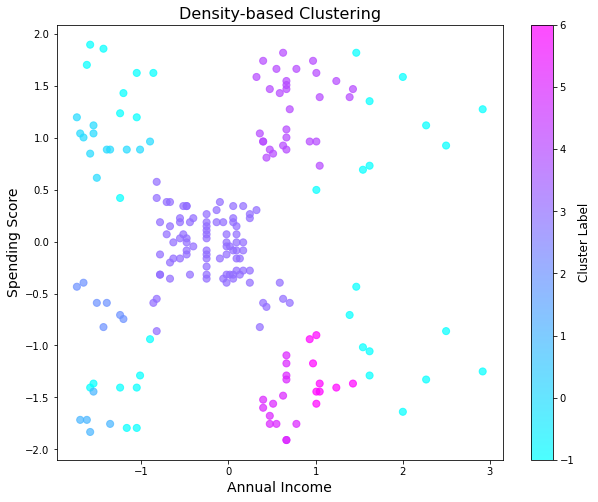

In [74]:
plt.figure(figsize=(10, 8)) 


plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=labels, cmap='cool', s=50, alpha=0.7)  

plt.title('Density-based Clustering', fontsize=16)
plt.xlabel('Annual Income', fontsize=14)
plt.ylabel('Spending Score', fontsize=14)


cbar = plt.colorbar()
cbar.set_label('Cluster Label', fontsize=12)


plt.show()